In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [8]:
print("\nDataset information:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe(include='all'))


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


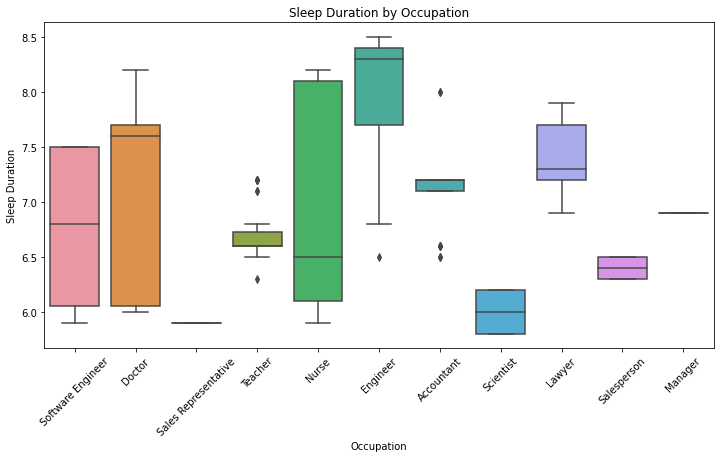

In [10]:
# Sleep duration by occupation

# sleep duration (hours)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Occupation')
plt.xticks(rotation=45)
plt.show()

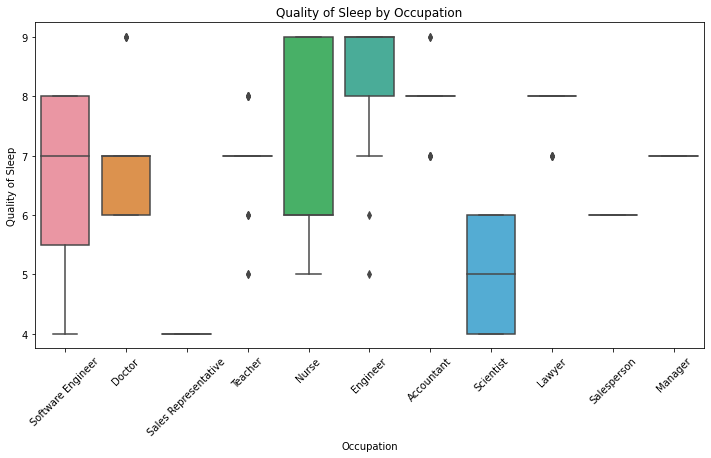

In [12]:
# Quality of sleep by occupation

# quality of sleep (scale: 1-10)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Quality of Sleep', data=df)
plt.title('Quality of Sleep by Occupation')
plt.xticks(rotation=45)
plt.show()

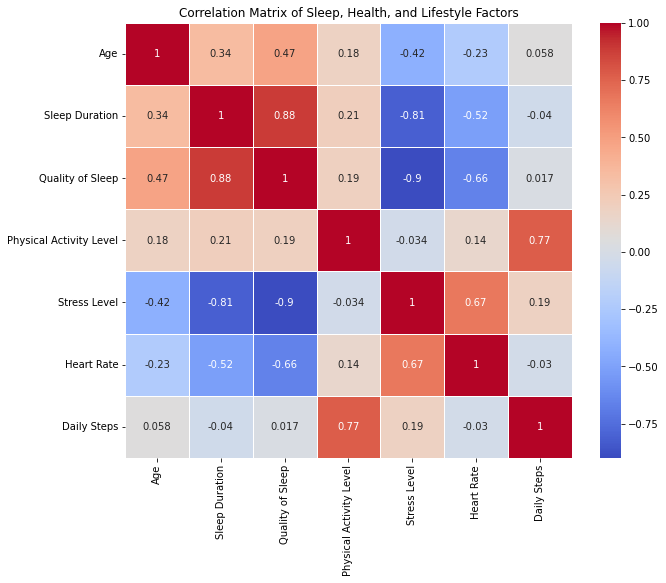

In [15]:
# Correlation matrix for numerical variables

# quality of sleep (scale: 1-10)
# stress level (scale: 1-10)
# physical activity level (minutes/day)
# heart rate (bpm)

numeric_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 
                   'Physical Activity Level', 'Stress Level', 
                   'Heart Rate', 'Daily Steps']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sleep, Health, and Lifestyle Factors')
plt.show()

In [24]:
# highly correlated variables
def find_highly_correlated_vars(corr_matrix, threshold=0.7):
    corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
    unique_corr_pairs = set()
    high_corr = []
    
    # gets rid of duplicates
    for (var1, var2), corr_value in corr_pairs.items():
        if var1 != var2 and (corr_value > threshold or corr_value < -threshold):
            pair = tuple(sorted((var1, var2)))
            if pair not in unique_corr_pairs:
                unique_corr_pairs.add(pair)
                high_corr.append((var1, var2, corr_value))
    
    return pd.DataFrame(high_corr, columns=['Variable 1', 'Variable 2', 'Correlation'])

highly_correlated_vars = find_highly_correlated_vars(correlation_matrix)
print("\nHighly Correlated Variables and their Coefficients:")
highly_correlated_vars


Highly Correlated Variables and their Coefficients:


,Variable 1,Variable 2,Correlation
0,Quality of Sleep,Sleep Duration,0.883213
1,Daily Steps,Physical Activity Level,0.772723
2,Sleep Duration,Stress Level,-0.811023
3,Quality of Sleep,Stress Level,-0.898752


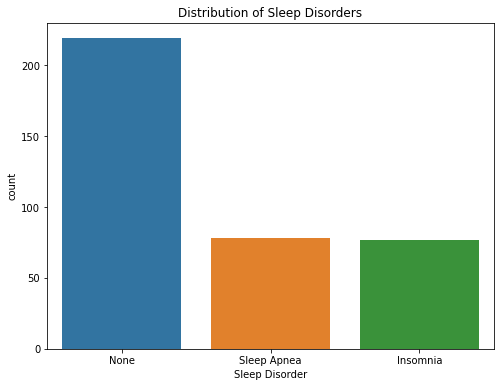

In [25]:
# distribution of sleep disorders
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep Disorder', data=df)
plt.title('Distribution of Sleep Disorders')
plt.show()

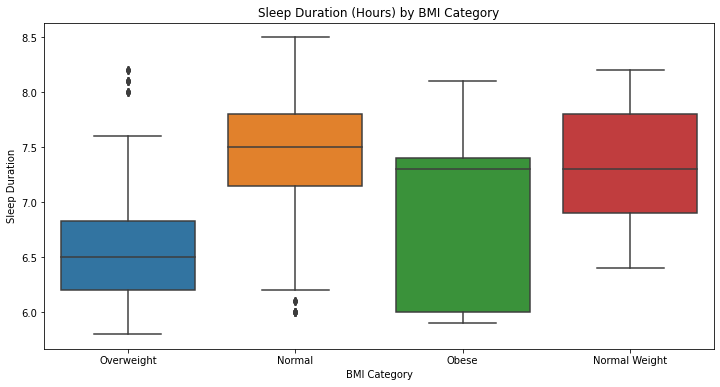

In [28]:
# sleep duration by BMI category
plt.figure(figsize=(12, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('Sleep Duration (Hours) by BMI Category')
plt.show()

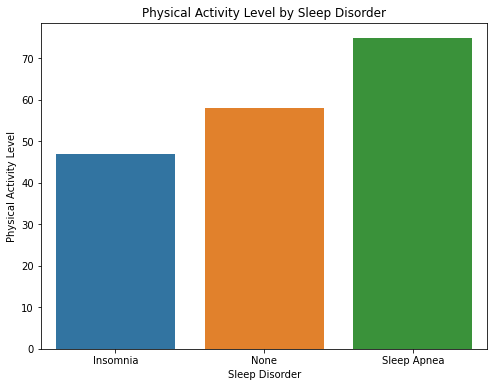

In [31]:
# average physical activity level by sleep disorder
avg_daily_steps = df.groupby('Sleep Disorder')['Physical Activity Level'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Sleep Disorder', y='Physical Activity Level', data=avg_daily_steps)
plt.title('Physical Activity Level by Sleep Disorder')
plt.show()

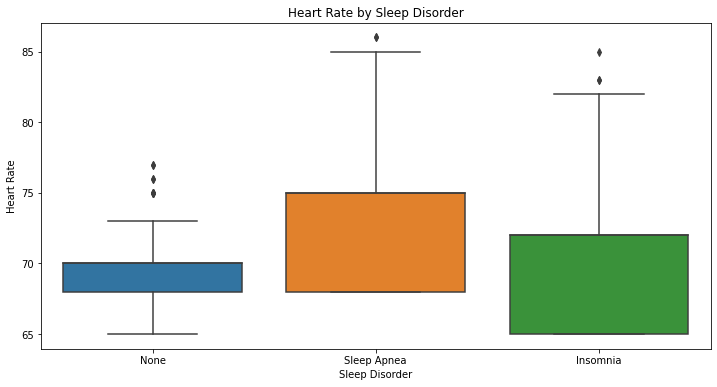

In [33]:
# blood pressure distribution by sleep disorder
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=df)
plt.title('Heart Rate by Sleep Disorder')
plt.show()

In [45]:
# Insights

def analyze_lifestyle(df):
    
    # average sleep duration by occupation
    avg_sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean().sort_values()
    print("Average Sleep Duration (hours) by Occupation:\n")
    print(avg_sleep_by_occupation)

    # average quality of sleep by occupation
    avg_quality_by_occupation = df.groupby('Occupation')['Quality of Sleep'].mean().sort_values()
    print("\n\nAverage Quality of Sleep (scale: 1-10) by Occupation:\n")
    print(avg_quality_by_occupation)
    
    # average blood pressure by occupation
    df['Systolic BP'] = df['Blood Pressure'].str.split('/').str[0].astype(int)
    df['Diastolic BP'] = df['Blood Pressure'].str.split('/').str[1].astype(int)

    avg_systolic_bp_by_occupation = df.groupby('Occupation')['Systolic BP'].mean().sort_values()
    avg_diastolic_bp_by_occupation = df.groupby('Occupation')['Diastolic BP'].mean().sort_values()
    
    print("\n\nAverage Systolic Blood Pressure by Occupation:\n")
    print(avg_systolic_bp_by_occupation)
    print("\n\nAverage Diastolic Blood Pressure by Occupation:\n")
    print(avg_diastolic_bp_by_occupation)
    
    # Mean Arterial Pressure (MAP) calculation
    df['MAP'] = (df['Systolic BP'] + 2 * df['Diastolic BP']) / 3
    avg_map_by_occupation = df.groupby('Occupation')['MAP'].mean().sort_values()
    print("\n\nAverage Mean Arterial Pressure (MAP) by Occupation:")
    print(avg_map_by_occupation)

    # pulse pressure calculation
    df['Pulse Pressure'] = df['Systolic BP'] - df['Diastolic BP']
    avg_pulse_pressure_by_occupation = df.groupby('Occupation')['Pulse Pressure'].mean().sort_values()
    print("\n\nAverage Pulse Pressure by Occupation:")
    print(avg_pulse_pressure_by_occupation)
    
    # average stress by occupation
    avg_stress_by_occupation = df.groupby('Occupation')['Stress Level'].mean().sort_values()
    print("\n\nAverage Stress Level by Occupation:")
    print(avg_stress_by_occupation)

    # best and worst occupations in terms of health variables
    
    # sleep
    best_occupation_sleep_duration = avg_sleep_by_occupation.idxmax()
    worst_occupation_sleep_duration = avg_sleep_by_occupation.idxmin()
    best_occupation_sleep_quality = avg_quality_by_occupation.idxmax()
    worst_occupation_sleep_quality = avg_quality_by_occupation.idxmin()

    print("\n\nBest Occupation for Sleep Duration:", best_occupation_sleep_duration)
    print("Worst Occupation for Sleep Duration:", worst_occupation_sleep_duration)
    print("Best Occupation for Sleep Quality:", best_occupation_sleep_quality)
    print("Worst Occupation for Sleep Quality:", worst_occupation_sleep_quality)

    #blood pressure
    best_occupation_systolic_bp = avg_systolic_bp_by_occupation.idxmin()
    worst_occupation_systolic_bp = avg_systolic_bp_by_occupation.idxmax()
    best_occupation_diastolic_bp = avg_diastolic_bp_by_occupation.idxmin()
    worst_occupation_diastolic_bp = avg_diastolic_bp_by_occupation.idxmax()

    print("\n\nBest Occupation for Systolic Blood Pressure:", best_occupation_systolic_bp)
    print("Worst Occupation for Systolic Blood Pressure:", worst_occupation_systolic_bp)
    print("Best Occupation for Diastolic Blood Pressure:", best_occupation_diastolic_bp)
    print("Worst Occupation for Diastolic Blood Pressure:", worst_occupation_diastolic_bp)

    # MAP and pulse pressure
    best_occupation_map = avg_map_by_occupation.idxmin()
    worst_occupation_map = avg_map_by_occupation.idxmax()
    best_occupation_pulse_pressure = avg_pulse_pressure_by_occupation.idxmin()
    worst_occupation_pulse_pressure = avg_pulse_pressure_by_occupation.idxmax()
    
    print("\n\nBest Occupation for Mean Arterial Pressure (MAP):", best_occupation_map)
    print("Worst Occupation for Mean Arterial Pressure (MAP):", worst_occupation_map)
    print("Best Occupation for Pulse Pressure:", best_occupation_pulse_pressure)
    print("Worst Occupation for Pulse Pressure:", worst_occupation_pulse_pressure)
    
    # stress
    best_occupation_stress_level = avg_stress_by_occupation.idxmin()
    worst_occupation_stress_level = avg_stress_by_occupation.idxmax()

    print("\n\nBest Occupation for Stress Level:", best_occupation_stress_level)
    print("Worst Occupation for Stress Level:", worst_occupation_stress_level)

analyze_lifestyle(df)

Average Sleep Duration (hours) by Occupation:

Occupation
Sales Representative    5.900000
Scientist               6.000000
Salesperson             6.403125
Teacher                 6.690000
Software Engineer       6.750000
Manager                 6.900000
Doctor                  6.970423
Nurse                   7.063014
Accountant              7.113514
Lawyer                  7.410638
Engineer                7.987302
Name: Sleep Duration, dtype: float64


Average Quality of Sleep (scale: 1-10) by Occupation:

Occupation
Sales Representative    4.000000
Scientist               5.000000
Salesperson             6.000000
Software Engineer       6.500000
Doctor                  6.647887
Teacher                 6.975000
Manager                 7.000000
Nurse                   7.369863
Accountant              7.891892
Lawyer                  7.893617
Engineer                8.412698
Name: Quality of Sleep, dtype: float64


Average Systolic Blood Pressure by Occupation:

Occupation
Accountant 